In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

In [3]:
df=pd.read_csv("data.csv")
df["cumsum_profit3"]=df["profit3"].cumsum()
df["cumsum_profit2"]=df["profit2"].cumsum()
df["cumsum_profit1"]=df["profit1"].cumsum()


df["delta_profit3"]=df["profit3"].diff()
df["SMA_profit3_1000"]=df["profit3"].rolling(1000).mean()
df["SMA_profit2_1000"]=df["profit2"].rolling(1000).mean()
df["SMA_profit1_1000"]=df["profit1"].rolling(1000).mean()

df

,stato0,stato1,profit1,profit2,profit3,price_chosen,price_chosen1,price_chosen2,price_chosen3,unit_sold1,unit_sold2,unit_sold3,cumsum_profit3,cumsum_profit2,cumsum_profit1,delta_profit3,SMA_profit3_1000,SMA_profit2_1000,SMA_profit1_1000
0,1.0,2.0,-35542.0,-14845.0,42000.000000,NaN,318.0,393.0,412.710966,231.0,335.0,500.0,4.200000e+04,-1.484500e+04,-35542.0,NaN,NaN,NaN,NaN
1,6.0,4.0,-90696.0,-28316.0,-259502.024983,NaN,572.0,434.0,675.866724,282.0,376.0,65.0,-2.175020e+05,-4.316100e+04,-126238.0,-301502.024983,NaN,NaN,NaN
2,3.0,6.0,13112.0,-67364.0,-358066.976519,NaN,414.0,604.0,815.765484,458.0,309.0,1.0,-5.755690e+05,-1.105250e+05,-113126.0,-98564.951535,NaN,NaN,NaN
3,2.0,4.0,-30025.0,42500.0,-75557.685650,NaN,355.0,464.0,328.619888,345.0,500.0,194.0,-6.511267e+05,-6.802500e+04,-143151.0,282509.290869,NaN,NaN,NaN
4,2.0,4.0,-45855.0,-21228.0,-137895.881500,NaN,393.0,484.0,583.556720,265.0,358.0,220.0,-7.890226e+05,-8.925300e+04,-189006.0,-62338.195850,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7.0,5.0,-169220.0,-34870.0,45500.000000,NaN,633.0,506.0,307.808808,160.0,355.0,500.0,1.757117e+08,-1.226661e+09,-945121064.0,14000.000000,16881.90067,-117498.147,-93385.842
9996,2.0,3.0,-18870.0,-102230.0,26500.000000,NaN,390.0,430.0,29.469643,367.0,189.0,500.0,1.757382e+08,-1.226764e+09,-945139934.0,-19000.000000,16871.90067,-117380.774,-93397.464
9997,5.0,5.0,-101175.0,-188328.0,42500.000000,NaN,525.0,519.0,61.469643,213.0,88.0,500.0,1.757807e+08,-1.226952e+09,-945241109.0,16000.000000,16864.90067,-117387.072,-93484.147
9998,5.0,7.0,-77850.0,-192519.0,35000.000000,NaN,550.0,589.0,286.808808,283.0,129.0,500.0,1.758157e+08,-1.227144e+09,-945318959.0,-7500.000000,16869.40067,-117364.336,-93559.794


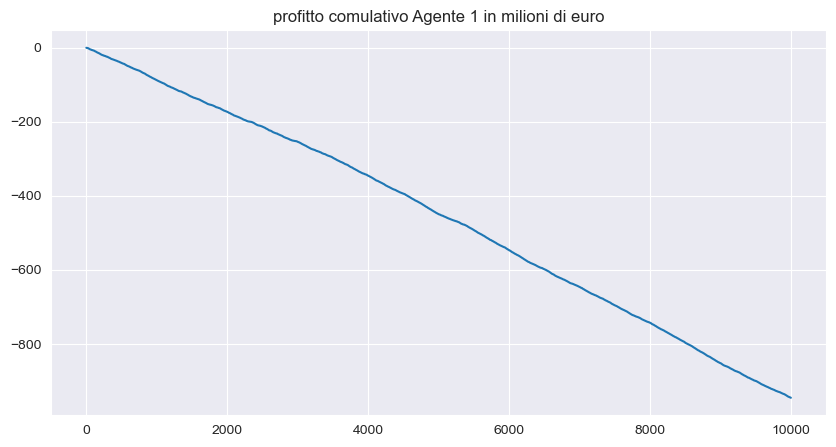

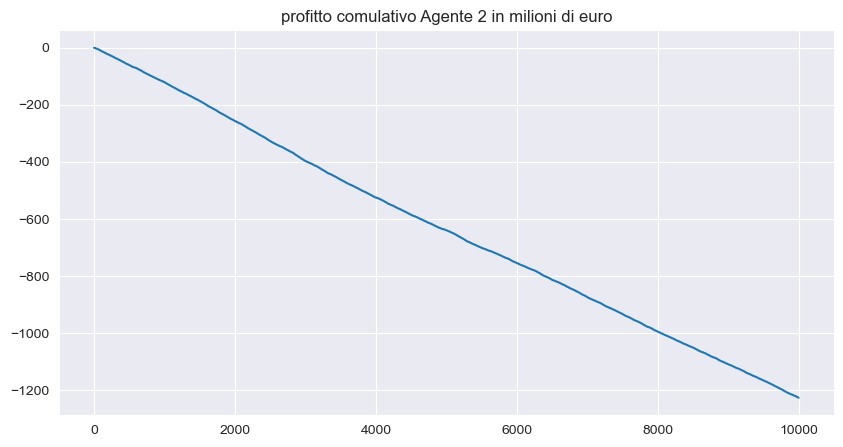

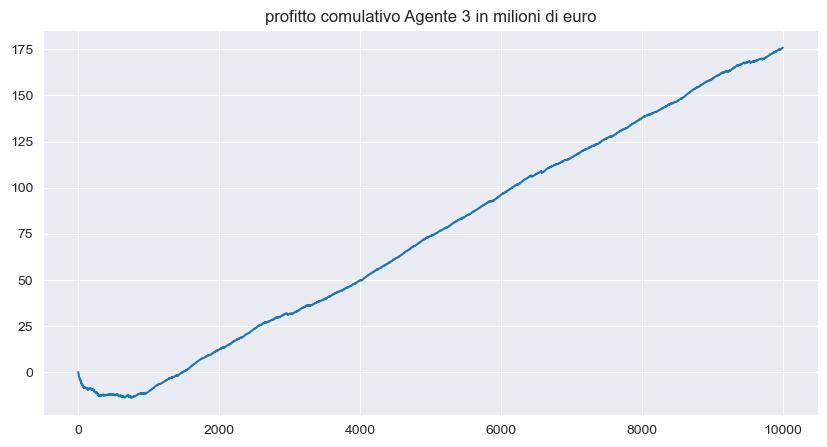

In [4]:

for i in range(1,4):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df["cumsum_profit"+str(i)]/1000000,label="profit3")
    ax.set_title("profitto comulativo Agente "+str(i)+ " in milioni di euro")
    ax.ticklabel_format(style='plain')
    plt.show()



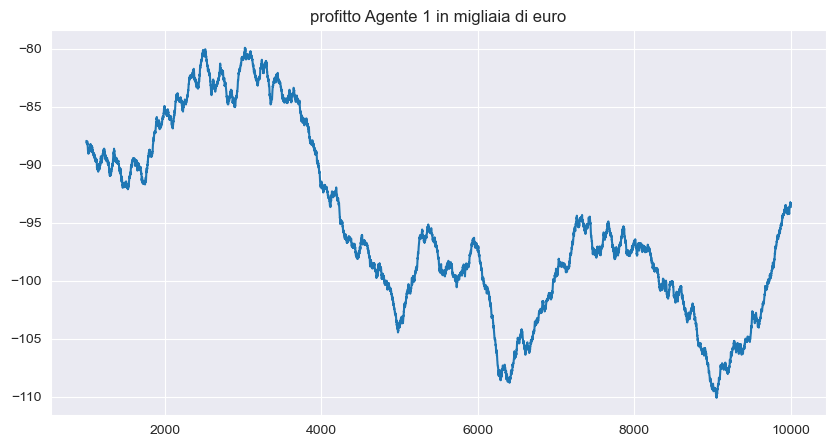

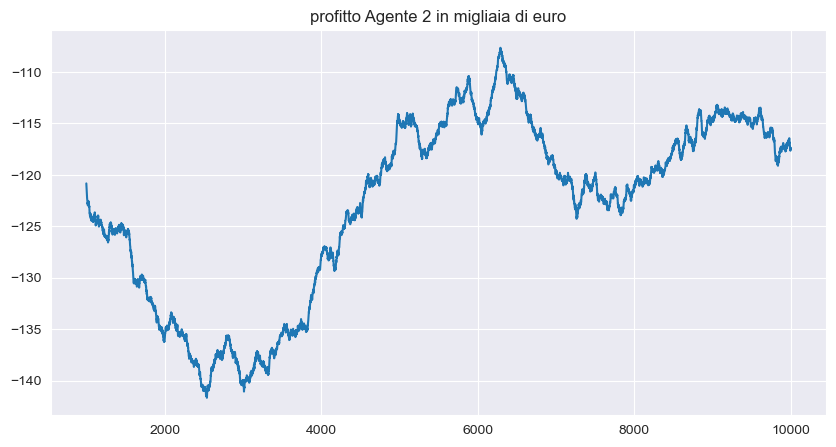

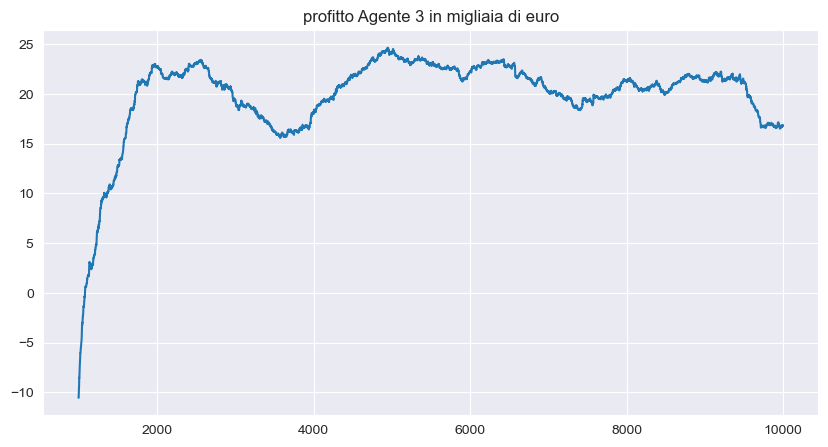

In [5]:
for i in range(1,4):
    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(df["SMA_profit"+str(i)+"_1000"]/1000,label="profit3")
    ax.set_title("profitto Agente "+str(i)+" in migliaia di euro")
    ax.ticklabel_format(style='plain')
    plt.show()


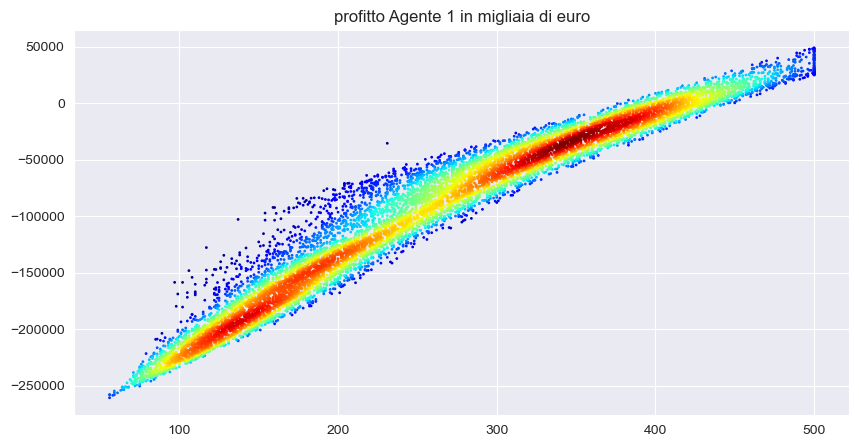

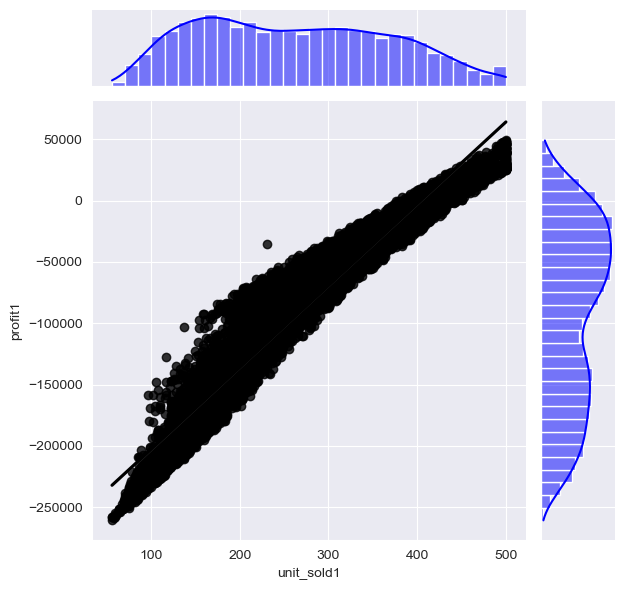

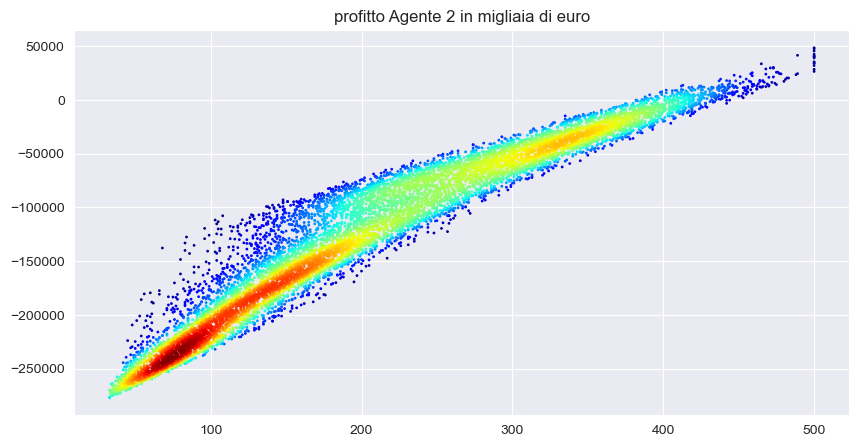

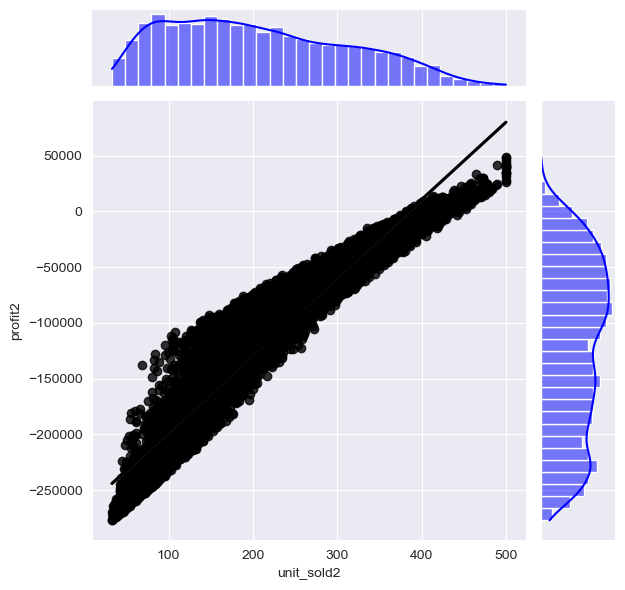

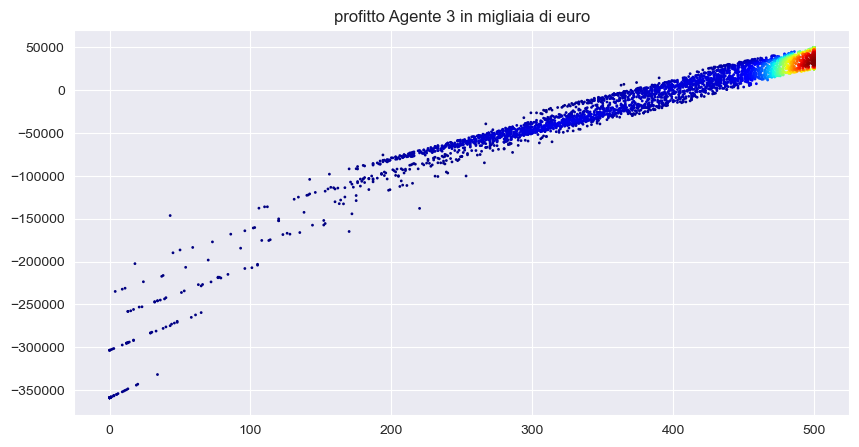

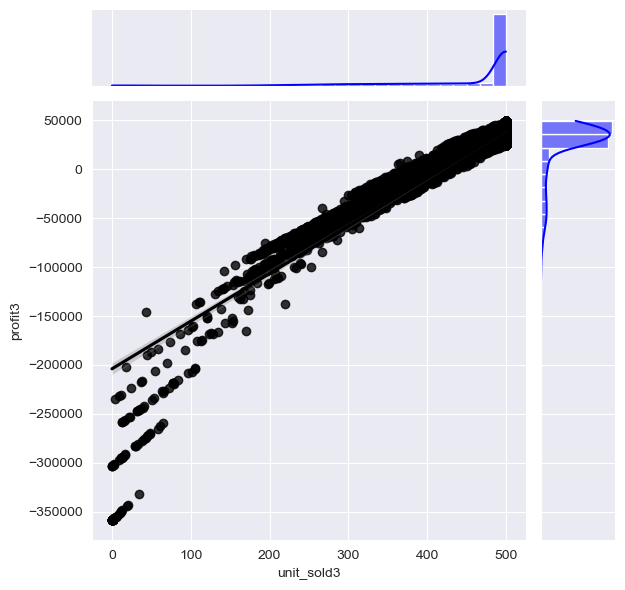

In [10]:
import matplotlib
import seaborn as sns
for i in range(1,4):
    fig, ax = plt.subplots(figsize=(10,5))
    
    x = df["unit_sold"+str(i)]
    y =df["profit"+str(i)]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    ax.scatter(x,y,label="profit3",s=1,c=z , cmap=plt.cm.jet)
    ax.set_title("profitto Agente "+str(i)+" in migliaia di euro")
    ax.ticklabel_format(style='plain')
    

    
    #sm=plt.cm.ScalarMappable(cmap=plt.cm.jet,norm = matplotlib.colors.PowerNorm(vmin = -0.1, vmax = 1000, gamma = 1))
    
    #fig.colorbar(sm)
    plt.show()
    
    
    sns.jointplot(x="unit_sold"+str(i), 
                  y="profit"+str(i), 
                  data=df,
                  kind="reg",
                  color="k",
                  marginal_kws=dict(bins=30,color='b'))